This dataset is a reaction optimization HTE dataset for a Suzuki reaction with the objectives to maximize conversion and selectivity.

To gain insights into the dataset, the distribution of the different objectives was analyzed.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import colorsys

# Doyle colors
doyle_colors = ["#CE4C6F", "#1561C2", "#188F9D","#C4ADA2","#515798", "#CB7D85", "#A9A9A9"]
# extension of palette with lighter and darker versions
def adjust_lightness(color, factor=1.2):
    """
    Function to make colors lighter (factor > 1) or darker (factor < 1).
    """
    r, g, b = mcolors.to_rgb(color)
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    l = max(0, min(1, l * factor))
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return mcolors.to_hex((r, g, b))

lighter = [adjust_lightness(c, 1.2) for c in doyle_colors]
darker  = [adjust_lightness(c, 0.7) for c in doyle_colors]
all_colors = doyle_colors + darker[::-1] + lighter[::-1] 

# Save the categorical colormap
cat_cmap = ListedColormap(all_colors, name="Doyle_cat")
plt.colormaps.register(cat_cmap)

# Define and save a continuous colormap
colors = [doyle_colors[1],"#FFFFFFD1",doyle_colors[0]]
cont_cmap = LinearSegmentedColormap.from_list("Doyle_cont", colors)
plt.colormaps.register(cont_cmap)

# General plt parameters
plt.rcParams.update({
    "axes.titlesize": 20,        # Subplot title
    "axes.labelsize": 16,        # X and Y labels
    "figure.titlesize": 24,      # Suptitle
    "xtick.labelsize": 14,       # X tick labels
    "ytick.labelsize": 14,       # Y tick labels
    "legend.fontsize": 14,       # Legend text
    "legend.title_fontsize": 14  # Legend titles
})

In [2]:
# Read in the dataset (already preprocessed).
df_data = pd.read_csv("suzuki_labelled_data.csv",header=0,index_col=0)
df_data.rename(columns={"objective_conversion":"Conversion","objective_selectivity":"Selectivity"},inplace=True)
df_data

,ligand_equivalent,Conversion,Selectivity,solvent_number_of_atoms,solvent_dipole,solvent_molar_volume,solvent_homo_energy,solvent_electronegativity,solvent_hardness,solvent_ES1_transition,...,ligand_c_max-1_%VBur_MING,ligand_c_max-1_%VBur_MAXG,ligand_c_max-1_%VBur_STDEV,base_Cs2CO3(aq.),base_CsF(aq.),base_KOAc,base_KOH(aq.),base_NaOH(aq.),base_None,base_s. NaHCO3(aq.)
0,0.1250,39.6,67.171717,6,1.6941,323.713,-0.26453,0.09464,0.16989,162.04,...,0.445705,0.445705,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.1250,52.3,74.378585,6,1.6941,323.713,-0.26453,0.09464,0.16989,162.04,...,0.445705,0.445705,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.1250,50.8,74.015748,6,1.6941,323.713,-0.26453,0.09464,0.16989,162.04,...,0.445705,0.445705,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.1250,50.3,73.558648,6,1.6941,323.713,-0.26453,0.09464,0.16989,162.04,...,0.445705,0.445705,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1250,61.5,78.211382,6,1.6941,323.713,-0.26453,0.09464,0.16989,162.04,...,0.445705,0.445705,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.0625,1.8,0.000000,12,3.8297,751.890,-0.24217,0.10499,0.13718,214.49,...,0.737493,0.719949,0.008268,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0.0625,2.1,0.000000,12,3.8297,751.890,-0.24217,0.10499,0.13718,214.49,...,0.737493,0.719949,0.008268,0.0,0.0,0.0,1.0,0.0,0.0,0.0
349,0.0625,2.1,0.000000,12,3.8297,751.890,-0.24217,0.10499,0.13718,214.49,...,0.737493,0.719949,0.008268,1.0,0.0,0.0,0.0,0.0,0.0,0.0
350,0.0625,2.6,34.615385,12,3.8297,751.890,-0.24217,0.10499,0.13718,214.49,...,0.737493,0.719949,0.008268,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Conversion distribution

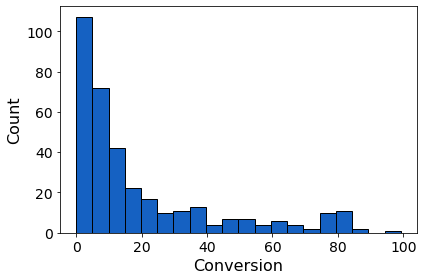

Mean conversion: 19.847
Median conversion: 9.7
Highest conversion: 99.2
Lowest conversion: 0.0
Fraction below 5% conversion: 30.4%
Fraction below 20% conversion: 69.0%


In [3]:
plt.figure(figsize=(6, 4))
plt.hist(df_data["Conversion"], color=all_colors[1], bins=20, edgecolor="k")
plt.xlabel("Conversion")
plt.ylabel("Count")
plt.tick_params(axis='both', which='major')
plt.tight_layout()
plt.show()
print(f'Mean conversion: {round(df_data["Conversion"].mean(),3)}')
print(f'Median conversion: {round(df_data["Conversion"].median(),3)}')
print(f'Highest conversion: {df_data["Conversion"].max()}')
print(f'Lowest conversion: {df_data["Conversion"].min()}')
print(f'Fraction below 5% conversion: {round(len(df_data[df_data["Conversion"] < 5])/len(df_data)*100,1)}%')
print(f'Fraction below 20% conversion: {round(len(df_data[df_data["Conversion"] < 20])/len(df_data)*100,1)}%')

The dataset is heavily skewed towards low conversions.

Selectivity distribution

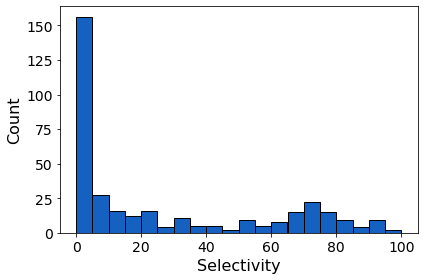

Mean selectivity: 25.917513243535833
Median selectivity: 8.467741935483872
Highest selectivity: 100.0
Lowest selectivity: 0.0


In [4]:
plt.figure(figsize=(6, 4))
plt.hist(df_data["Selectivity"], color=all_colors[1], bins=20, edgecolor="k")
plt.xlabel("Selectivity")
plt.ylabel("Count")
plt.tick_params(axis='both', which='major')
plt.tight_layout()
plt.show()

print(f'Mean selectivity: {df_data["Selectivity"].mean()}')
print(f'Median selectivity: {df_data["Selectivity"].median()}')
print(f'Highest selectivity: {df_data["Selectivity"].max()}')
print(f'Lowest selectivity: {df_data["Selectivity"].min()}')

The Selectivity distribution is skewed towards high performance.

Two dimensional view (using normalized data based on the extreme values of the two objectives)

In [5]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df_data[["Selectivity","Conversion"]].to_numpy()),index=df_data.index,columns=["Selectivity","Conversion"])
# The Conversions don't have to be scaled because they are already on a (0,1) scale
df["objective_score"] = (df["Selectivity"] + df["Conversion"])/2
df

,Selectivity,Conversion,objective_score
0,0.671717,0.399194,0.535455
1,0.743786,0.527218,0.635502
2,0.740157,0.512097,0.626127
3,0.735586,0.507056,0.621321
4,0.782114,0.619960,0.701037
...,...,...,...
347,0.000000,0.018145,0.009073
348,0.000000,0.021169,0.010585
349,0.000000,0.021169,0.010585
350,0.346154,0.026210,0.186182


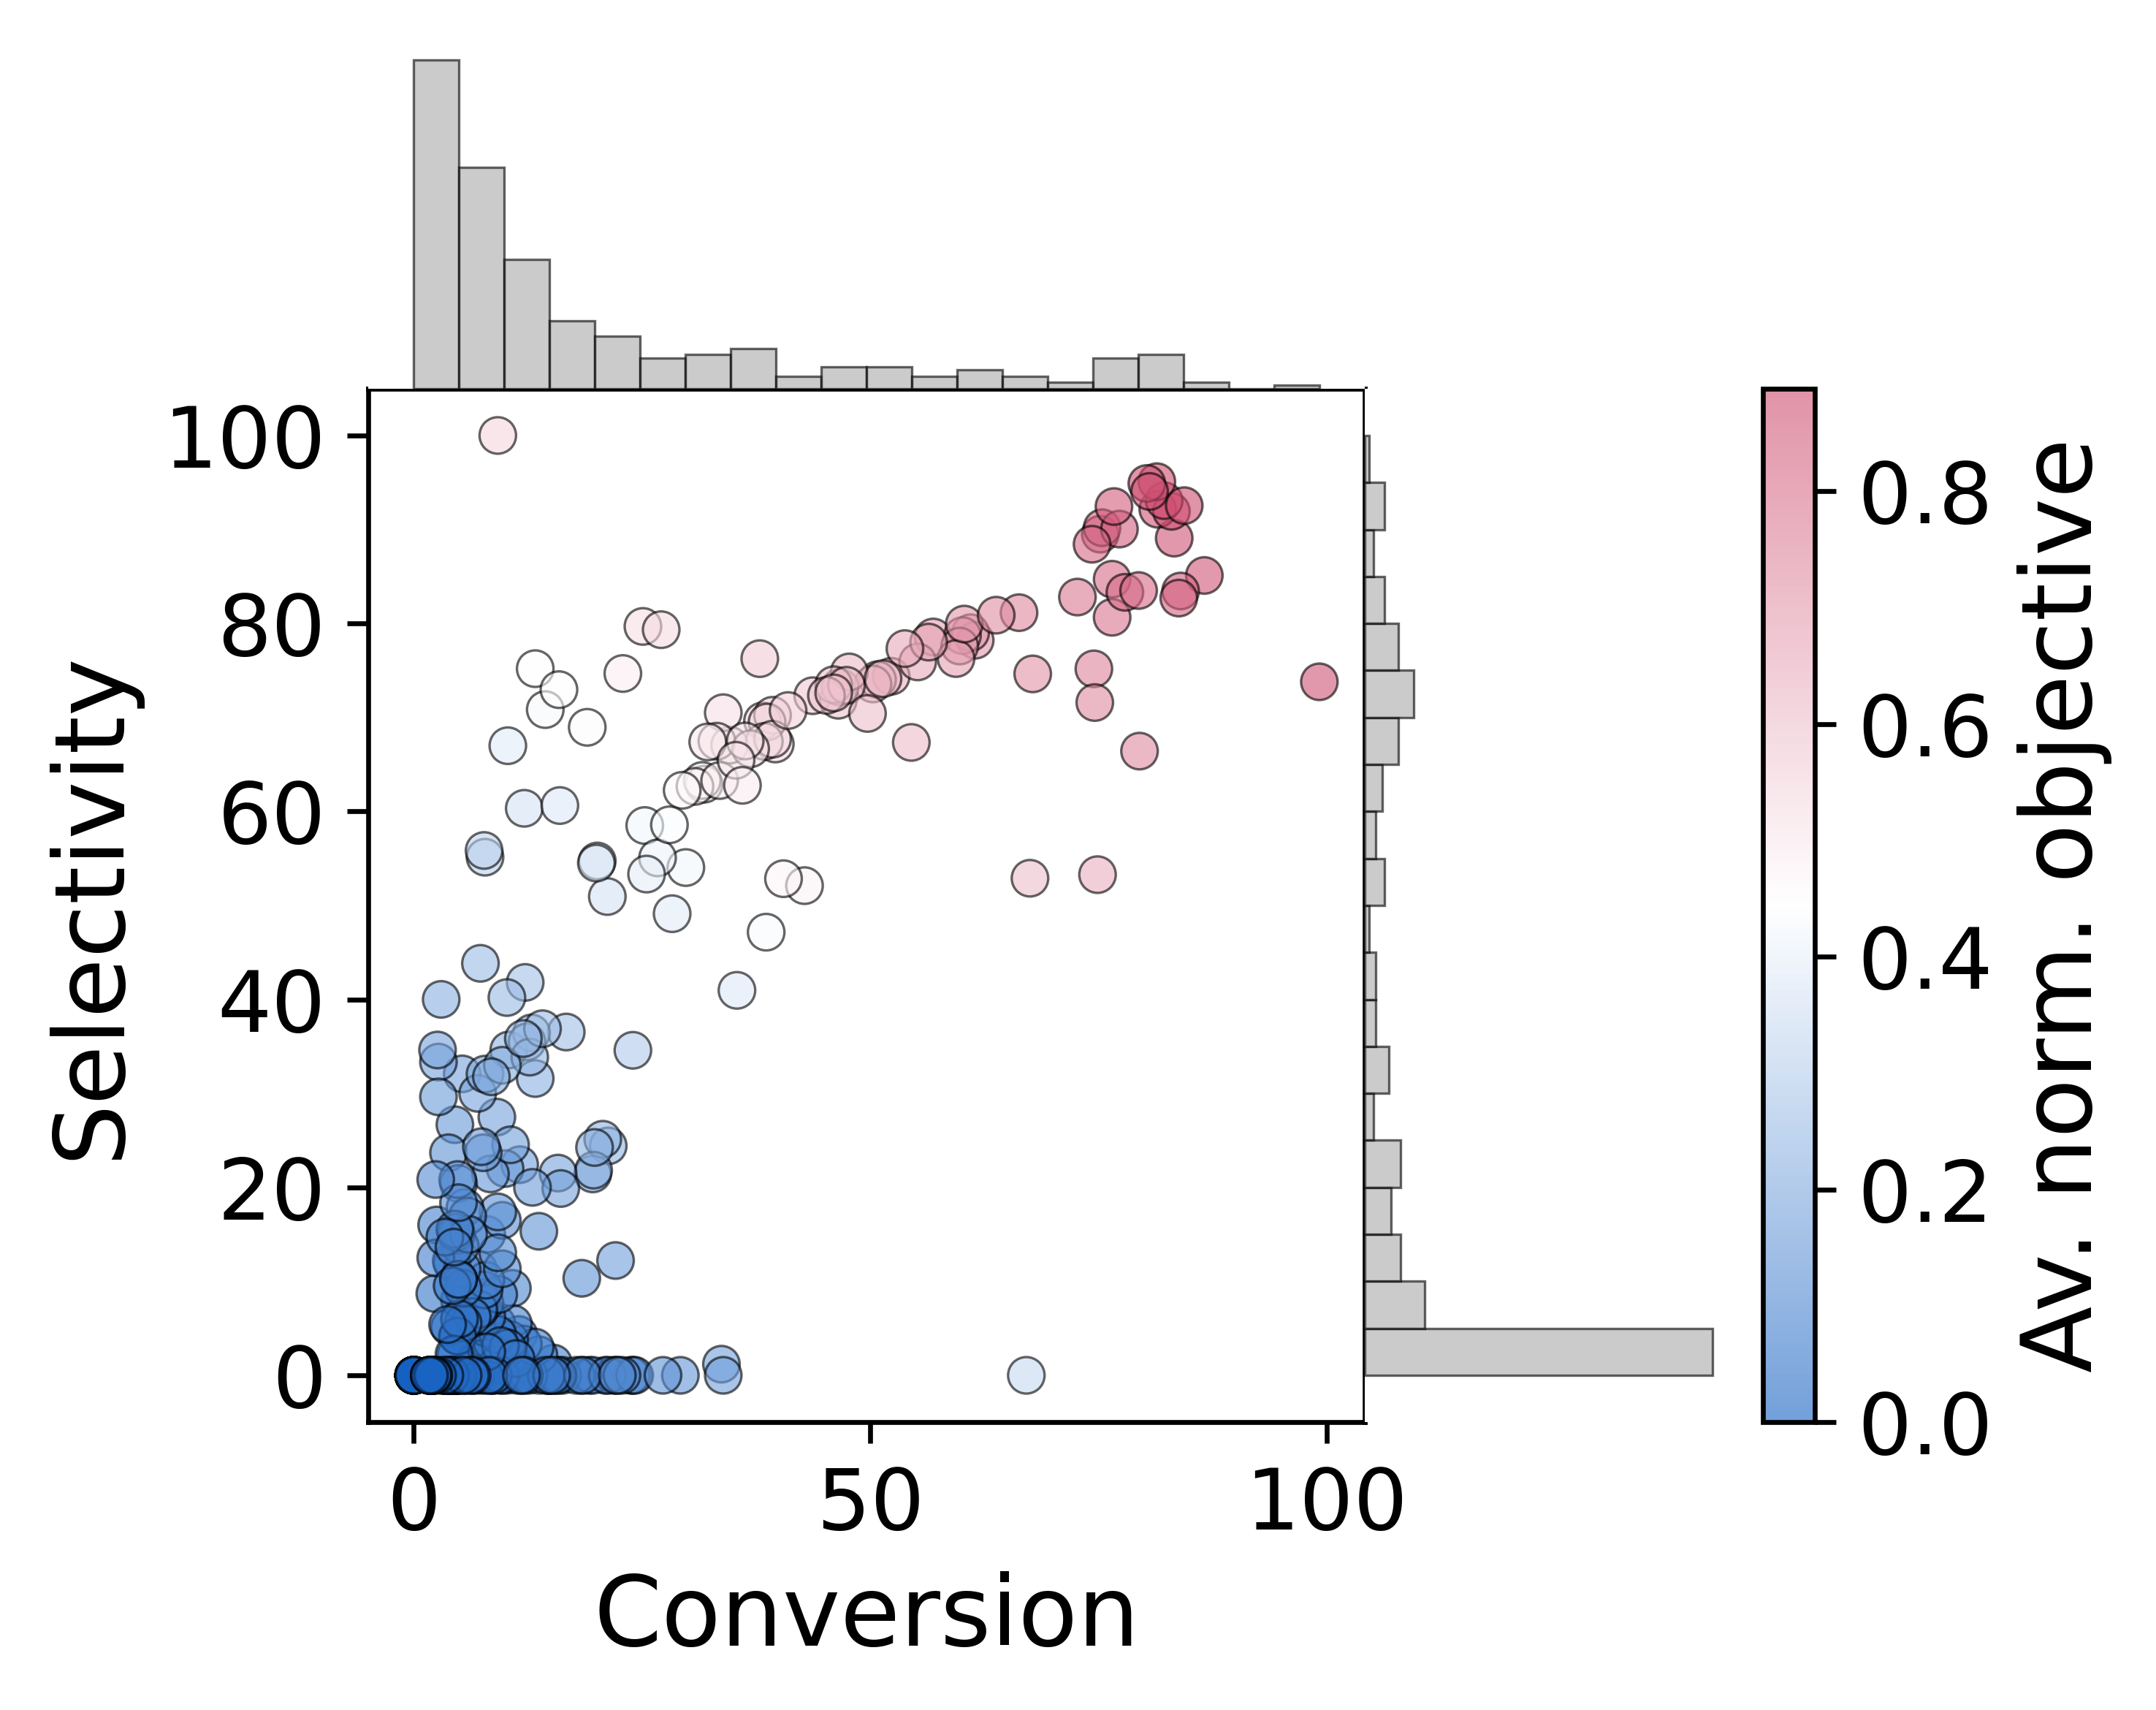

In [6]:
# Extract variables
x = df_data["Conversion"]
y = df_data["Selectivity"]
c = df["objective_score"]

# --- Create a figure with custom layout ---
fig = plt.figure(figsize=(5, 4), dpi=600)
gs = gridspec.GridSpec(
    2, 2,
    width_ratios=[3, 2],
    height_ratios=[1, 3],
    wspace=0.0,
    hspace=0.0
)

# Main scatter plot
ax_scatter = fig.add_subplot(gs[1, 0])
sc = ax_scatter.scatter(
    x, y,
    c=c,
    cmap="Doyle_cont",
    alpha=0.6,
    edgecolor="k",
    linewidth=0.4
)

# Marginal histograms
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

ax_histx.hist(x, bins=20, color=all_colors[6], edgecolor="k", linewidth=0.4, alpha=0.6)
ax_histy.hist(y, bins=20, color=all_colors[6], edgecolor="k", linewidth=0.4, alpha=0.6, orientation="horizontal")

# --- Remove ticks and labels from marginals ---
ax_histx.tick_params(axis="both", which="both", bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax_histy.tick_params(axis="both", which="both", bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# --- Labels and colorbar ---
ax_scatter.set_xlabel("Conversion")
ax_scatter.set_ylabel("Selectivity")

cbar = fig.colorbar(sc, ax=ax_histy, fraction=0.4, pad=0.05)
cbar.set_label("Av. norm. objective")

for spine in ["top", "right","left","bottom"]:
    ax_histx.spines[spine].set_visible(False)
    ax_histy.spines[spine].set_visible(False)




plt.tight_layout()
plt.show()


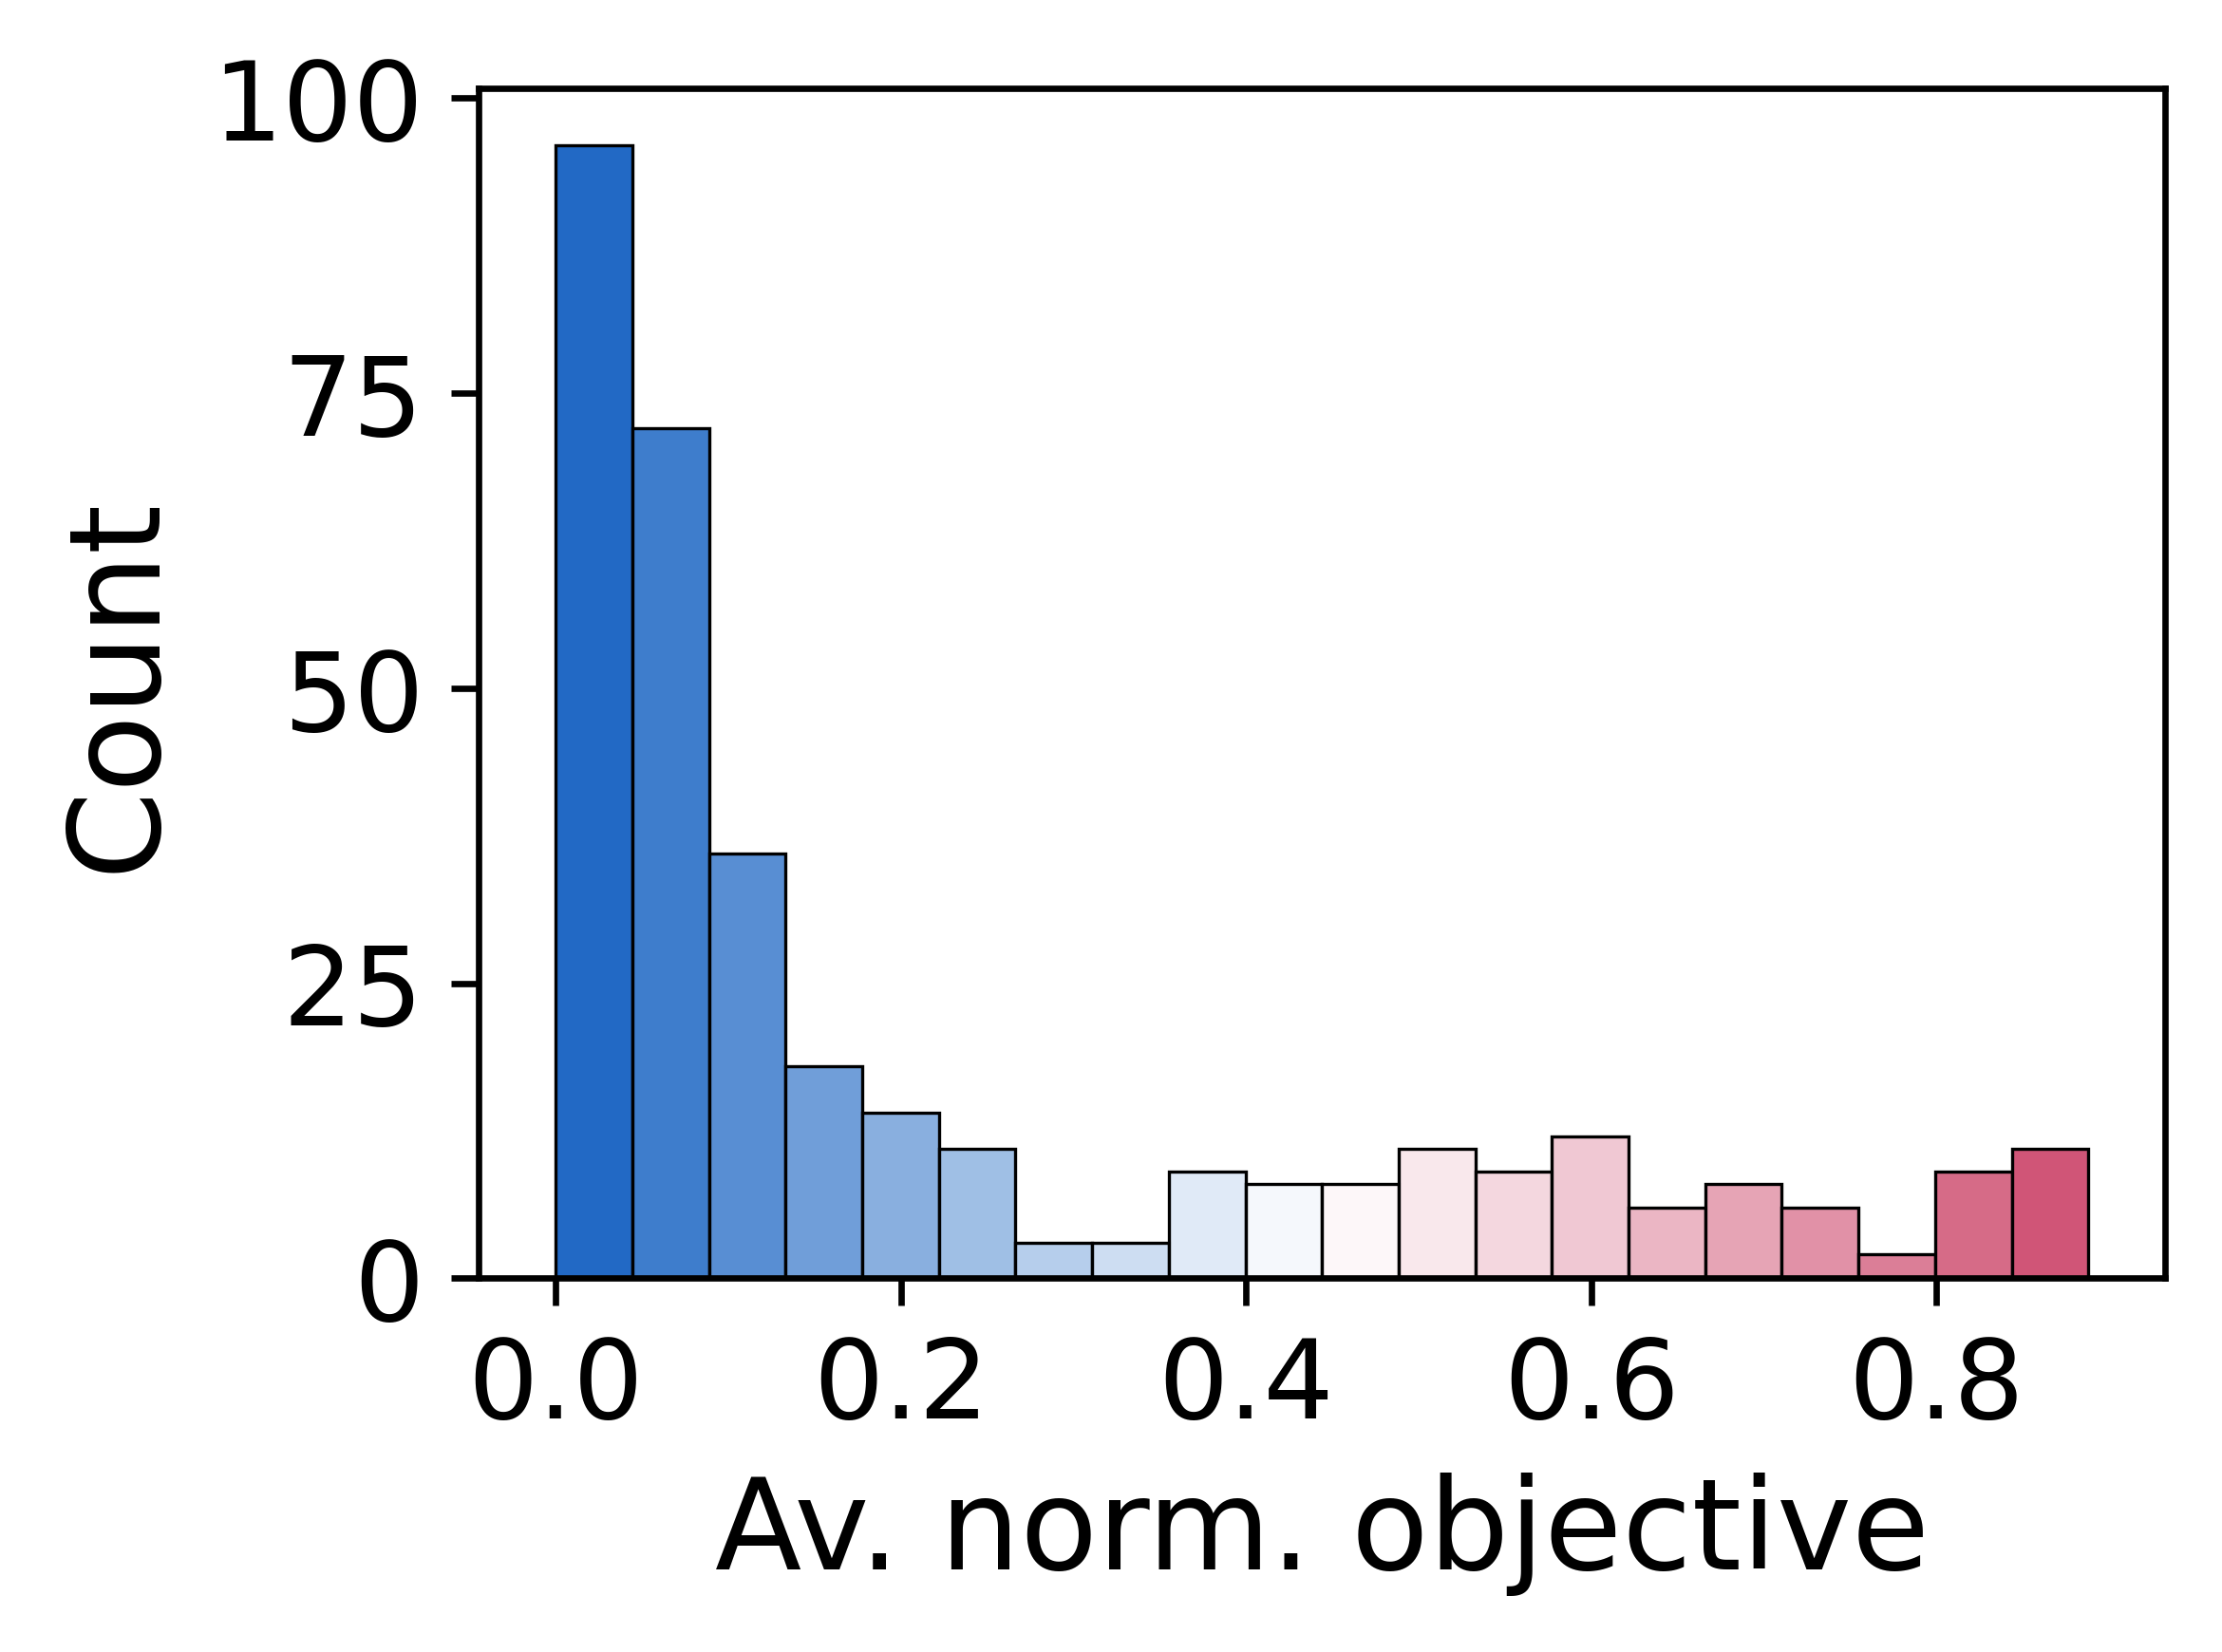

Mean objective_score: 0.23
Highest objective_score: 0.888
Lowest objective_score: 0.0


In [7]:
plt.figure(figsize=(4, 3), dpi=600)

# Compute histogram data first
data = df["objective_score"].dropna()
counts, bins = np.histogram(data, bins=20)

# Compute bin centers for coloring
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Map bin centers to colors using vlag colormap
cmap = plt.cm.get_cmap("Doyle_cont")
norm = plt.Normalize(vmin=data.min(), vmax=data.max())
colors = cmap(norm(bin_centers))

# Draw colored bars manually
plt.bar(
    bin_centers,
    counts,
    width=(bins[1] - bins[0]),
    color=colors,
    edgecolor='k',
    linewidth=0.4
)

# Add labels
plt.xlabel("Av. norm. objective")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

print(f'Mean objective_score: {round(df["objective_score"].mean(),3)}')
print(f'Highest objective_score: {round(df["objective_score"].max(),3)}')
print(f'Lowest objective_score: {round(df["objective_score"].min(),3)}')

Most samples have low conversion and low selectivity leading to an objective distribution in which most samples perform very poorly.

In [8]:
print(f"All {len(df_data.columns)} Features in the dataset:")
df_data.columns.to_list()

All 171 Features in the dataset:


['ligand_equivalent',
 'Conversion',
 'Selectivity',
 'solvent_number_of_atoms',
 'solvent_dipole',
 'solvent_molar_volume',
 'solvent_homo_energy',
 'solvent_electronegativity',
 'solvent_hardness',
 'solvent_ES1_transition',
 'solvent_ES1_osc_strength',
 'solvent_ES2_transition',
 'solvent_ES4_osc_strength',
 'solvent_ES5_osc_strength',
 'solvent_ES7_osc_strength',
 'solvent_ES8_osc_strength',
 'solvent_atom1_NPA_charge',
 'solvent_atom1_ES_root_Mulliken_charge',
 'solvent_c_min_NPA_Rydberg',
 'solvent_c_min+1_ES_root_Mulliken_charge',
 'solvent_c_max_NPA_charge',
 'solvent_c_max-1_atom_number',
 'ligand_bidentateQ',
 'ligand_number_of_atoms_MING',
 'ligand_dipole_MING',
 'ligand_dipole_MAXG',
 'ligand_dipole_MEAN',
 'ligand_dipole_STDEV',
 'ligand_molar_mass_MING',
 'ligand_molar_volume_MING',
 'ligand_molar_volume_MAXG',
 'ligand_molar_volume_STDEV',
 'ligand_electronic_spatial_extent_STDEV',
 'ligand_homo_energy_MING',
 'ligand_homo_energy_STDEV',
 'ligand_lumo_energy_MING',
 'lig